![IFMG](https://storage.googleapis.com/ifmg/IFMG.png)

---
# Inteligência Artificial

## Métodos de Busca

### Professor: Felipe Reis


---
### Informações Iniciais

O presente tutorial tem como objetivo estudar os seguintes algoritmos:

* Busca em Largura
* Busca em Profundidade
* Busca com Profundidade Limitada

#### Referências

O tutorial abaixo foi inspirado nas seguintes links:

* Ben Coppin. **Artificial Intelligence Illuminated, 1st edition**. 2004. Jones and Bartlett Publishers.

* Stuart Russel e Peter Norvig. **Inteligência artificial, 3a edição**. 2013. Campus - Elsevier.

* Shivali Bhadaniya. **Depth First Search in Python (with Code) | DFS Algorithm**. 2020. Disponível em: https://favtutor.com/blogs/depth-first-search-python

* Abhilash Bandla. **How to implement Breadth First Search algorithm in Python**. Disponível em: https://www.codespeedy.com/breadth-first-search-algorithm-in-python/

### Importação de bibliotecas 

In [1]:
import numpy as np
import numpy.random as rd
import operator 
import matplotlib.pyplot as plt

import networkx as nx

from queue import LifoQueue as Stack
from queue import Queue

---
# Representação de Grafos

Podemos representar grafos usando a biblioteca NetworkX.

Para mais informações, acesse https://networkx.org/

In [2]:
#podemos representar um grafo como uma matriz de adjacencias
matriz_adj = {
 '1': [],
 '2': [],
 '3': ['2', '4'],
 '4': [],
 '5': ['3','7','8'],
 '6': ['9'],
 '7': ['1'],
 '8': ['6'],
 '9': []
}

In [3]:
#gera um grafo usando biblioteca networkx
#essa biblioteca permite a representação visual de um grafo

def gera_grafo(adj_matrix):
    G = nx.Graph()

    #percorre matriz de adjacencias para gerar grafo
    for node in adj_matrix:
        G.add_node(node) #adiciona nós
        
        for edge in adj_matrix[node]:
            G.add_edge(node, edge) #adiciona arestas
    
    return G

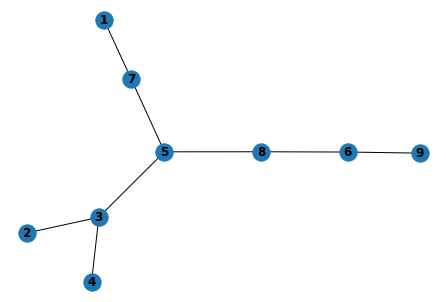

In [4]:
#imprime representacao de um grafo
G = gera_grafo(matriz_adj)
nx.draw(G, with_labels=True, font_weight='bold')

---
# Busca Básica

## Busca em Largura

In [5]:
def busca_largura(graph, initial):
    visited = []
    queue = [initial]
    
    while queue:
        node = queue.pop(0) #implementação de fila
        
        if node not in visited:
            visited.append(node)
            neighbours = graph[node]
            
            for neighbour in neighbours:
                queue.append(neighbour)
    return visited

In [6]:
graph = matriz_adj.copy()
print(busca_largura(graph,'5'))

['5', '3', '7', '8', '2', '4', '1', '6', '9']


## Busca em Profundidade

### Busca em Profundidade baseada na Busca em Largura

Para implementar uma Busca em Profundidade, baseado no método de Busca em Largura, basta alterar a fila por uma pilha, no comando abaixo.

```
node = queue.pop() #implementação de pilha
```

Apesar da busca iniciar da direita para esquerda, ela continua sendo classificada como uma busca em profundidade.

In [7]:
#implementação da busca em profundidade, baseado no código de busca em largura
def busca_profundidade(graph, initial):
    visited = []
    queue = [initial]
    
    while queue:
        node = queue.pop() #implementação de pilha
        
        if node not in visited:
            visited.append(node)
            neighbours = graph[node]
            
            for neighbour in neighbours:
                queue.append(neighbour)
    return visited

In [8]:
graph = matriz_adj.copy()
print(busca_profundidade(graph,'5'))

['5', '8', '6', '9', '7', '1', '3', '4', '2']


### Busca em Profundidade Recursiva

In [9]:
def busca_profundidade_recursiva(matriz_adj, node):
    visited = []
    
    if node not in visited:
        visited.append(node)
        
        for neighbour in matriz_adj[node]:
            vis = busca_profundidade_recursiva(matriz_adj, neighbour)
            
            if(vis != None): #nó folha
                visited.extend(vis)
                
    return visited

In [10]:
graph = matriz_adj.copy()
print(busca_profundidade_recursiva(matriz_adj, '5'))

['5', '3', '2', '4', '7', '1', '8', '6', '9']


## Busca com Profundidade Limitada

In [11]:
def busca_profundidade_limitada(matriz_adj, node, max_prof):
    visited = []
    
    if(max_prof >= 0):
        max_prof -= 1
    
        if node not in visited:
            visited.append(node)

            for neighbour in matriz_adj[node]:
                vis = busca_profundidade_limitada(matriz_adj, neighbour, max_prof)
                
                if(vis != None): #nó folha
                    visited.extend(vis)
                
    return visited

In [12]:
graph = matriz_adj.copy()
print(busca_profundidade_limitada(matriz_adj, '5', 1))

['5', '3', '7', '8']


---
---
# Grafos - Distâncias Cidades Romênia

Reprodução do grafo contendo distâncias reais entre algumas cidades da Romênia (slide 48). 

Referências:
* Johnson, M. (2008). Informed search methods. [Online]; acessado em 06 de JUlho de 2021. Disponível em: https://www.massey.ac.nz/~mjjohnso/notes/59302/l04.html.
* Russel, S. and Norvig, P. (2013). Inteligência artificial. Campus - Elsevier, 3 edition.

In [13]:
cidades = {
    "Arad": (-4, 4),
    "Zerind": (-3.8, 5), 
    "Oradea": (-3.5, 6), 
    "Timisoara": (-3.9, 2), 
    "Lugoj": (-3, 1), 
    "Mehadia": (-3, 0),
    "Dobreta": (-3, -1), 
    "Craiova": (-2, -1), 
    "Rimnicu": (-2.3, 2), 
    "Pitesti": (-1, 1), 
    "Sibiu": (-2.5, 3), 
    "Fagaras": (-1.5, 3),
    "Bucharest": (0, 0),
    "Giurgiu": (-0.5, -1),
    "Urziceni": (1, 0.5),
    "Vaslui": (2, 3),
    "Iasi": (1, 5),
    "Neamt": (0, 6),
    "Hirsova": (2, 0.5),
    "Eforie": (3, -1)
}

distancias ={
    "Arad": [("Sibiu", 140), ("Zerind", 75), ("Timisoara", 118)],
    "Zerind": [("Oradea", 71), ("Arad", 75)],
    "Oradea": [("Sibiu", 151), ("Zerind", 71)],
    "Timisoara": [("Arad", 118), ("Lugoj", 111)],
    "Lugoj": [("Timisoara", 111), ("Mehadia", 70)],
    "Mehadia": [("Lugoj", 70), ("Dobreta",75)],
    "Dobreta": [("Mehadia", 75), ("Craiova", 120)],
    "Craiova": [("Dobreta", 120), ("Rimnicu", 146), ("Pitesti", 138)],
    "Rimnicu": [("Craiova", 146), ("Sibiu", 80), ("Pitesti", 97)], 
    "Pitesti": [("Craiova", 138), ("Rimnicu", 97), ("Bucharest", 101)],
    "Sibiu": [("Rimnicu", 80), ("Oradea", 151), ("Arad", 140), ("Fagaras", 99)],
    "Fagaras": [("Sibiu", 99), ("Bucharest", 211)],
    "Bucharest": [("Fagaras", 211), ("Pitesti", 101), ("Giurgiu", 90), ("Urziceni", 85)],
    "Giurgiu": [("Bucharest", 90)],
    "Urziceni": [("Bucharest", 85), ("Vaslui", 142), ("Hirsova", 98)],
    "Vaslui": [("Urziceni", 142), ("Iasi", 92)],
    "Iasi": [("Vaslui", 92), ("Neamt", 87)], 
    "Neamt": [("Iasi", 87)], 
    "Hirsova": [("Urziceni", 98), ("Eforie", 86)],
    "Eforie": [("Hirsova", 86)],
}

G = nx.Graph()
print(G)

for c in cidades:
    G.add_node(c, pos=cidades[c])
    #print(c, cidades[c])
    
for origem in distancias:
    for destino, peso in distancias[origem]:
        G.add_edge(origem, destino, weight=peso)
        #print(origem, destino, peso)

Plota o gráfico criado.

{('Arad', 'Sibiu'): Text(-3.25, 3.5, '140'),
 ('Arad', 'Zerind'): Text(-3.9, 4.5, '75'),
 ('Arad', 'Timisoara'): Text(-3.95, 3.0, '118'),
 ('Zerind', 'Oradea'): Text(-3.65, 5.5, '71'),
 ('Oradea', 'Sibiu'): Text(-3.0, 4.5, '151'),
 ('Timisoara', 'Lugoj'): Text(-3.45, 1.5, '111'),
 ('Lugoj', 'Mehadia'): Text(-3.0, 0.5, '70'),
 ('Mehadia', 'Dobreta'): Text(-3.0, -0.5, '75'),
 ('Dobreta', 'Craiova'): Text(-2.5, -1.0, '120'),
 ('Craiova', 'Rimnicu'): Text(-2.15, 0.5, '146'),
 ('Craiova', 'Pitesti'): Text(-1.5, 0.0, '138'),
 ('Rimnicu', 'Sibiu'): Text(-2.4, 2.5, '80'),
 ('Rimnicu', 'Pitesti'): Text(-1.65, 1.5, '97'),
 ('Pitesti', 'Bucharest'): Text(-0.5, 0.5, '101'),
 ('Sibiu', 'Fagaras'): Text(-2.0, 3.0, '99'),
 ('Fagaras', 'Bucharest'): Text(-0.75, 1.5, '211'),
 ('Bucharest', 'Giurgiu'): Text(-0.25, -0.5, '90'),
 ('Bucharest', 'Urziceni'): Text(0.5, 0.25, '85'),
 ('Urziceni', 'Vaslui'): Text(1.5, 1.75, '142'),
 ('Urziceni', 'Hirsova'): Text(1.5, 0.5, '98'),
 ('Vaslui', 'Iasi'): Text(1.5, 

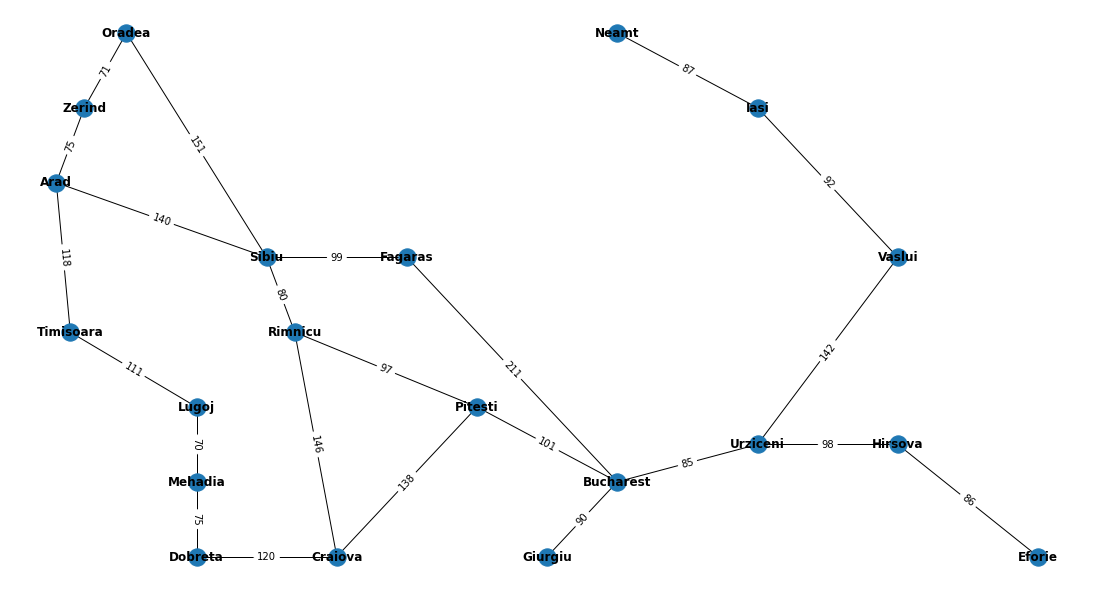

In [14]:
pos=nx.get_node_attributes(G,'pos')
labels = nx.get_edge_attributes(G,'weight')

plt.figure(figsize=(15,8)) 
nx.draw(G, pos=pos, with_labels=True, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)

Para implementação da busca A*, precisamos criar uma função heurística.

A função a ser criada, será implementada apenas como uma lista, com a distância até Bucareste.

In [15]:
def h_cidade(cidade_atual, destino='Bucharest'):
    hx = {
        "Arad": 366, #366
        "Zerind": 374,
        "Oradea": 380,
        "Timisoara": 329,
        "Lugoj": 244,
        "Mehadia": 241,
        "Dobreta": 242,
        "Craiova": 160,
        "Rimnicu": 193,
        "Pitesti": 100,
        "Sibiu": 253,
        "Fagaras": 176,
        "Bucharest": 0,
        "Giurgiu": 77,
        "Urziceni": 80,
        "Vaslui": 199,
        "Iasi": 226,
        "Neamt": 234,
        "Hirsova": 151,
        "Eforie": 161
    }
    return hx[cidade_atual]

### Buscas A* e Dijkstra

Podemos definir a origem, destino e aplicar os métodos de Dijkstra e A*.

Para maiores detalhes sobre os métodos de busca, acesse a [lista de algoritmos](https://networkx.org/documentation/networkx-1.10/reference/algorithms.shortest_paths.html) da biblioteca NetworkX.

In [16]:
origem = 'Timisoara'
destino = 'Bucharest'

#### Busca A*

Links:
- https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.shortest_paths.astar.astar_path.html
- https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.shortest_paths.astar.astar_path_length.html

In [17]:
print(nx.astar_path(G, origem, destino, heuristic=h_cidade))
print(nx.astar_path_length(G, origem, destino, heuristic=h_cidade))

['Timisoara', 'Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest']
536


#### Algoritmo de Dijkstra

Links:
- https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.shortest_paths.weighted.dijkstra_path.html
- https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.shortest_paths.weighted.dijkstra_path_length.html

In [18]:
print(nx.dijkstra_path(G, origem, destino))
print(nx.dijkstra_path_length(G, origem, destino))

['Timisoara', 'Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest']
536


#### Dijkstra Bidirecional

Links:
https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.algorithms.shortest_paths.weighted.bidirectional_dijkstra.html

In [19]:
print(nx.bidirectional_dijkstra(G, origem, destino))

(536, ['Timisoara', 'Arad', 'Sibiu', 'Rimnicu', 'Pitesti', 'Bucharest'])


---
# Busca Informada

## Best-First Search (BFS)

Implementação do BFS recursivo, com o mínimo de recursos possíveis.

In [20]:
def simple_bfs(origem, destino='Bucharest'):
    print(origem)
    
    if(origem != destino):        
        adjacentes, pesos = [], []

        #percorre a lista de nós adjacentes
        for dist, cr in distancias[origem]:
            adjacentes.append(dist)
            pesos.append(h_cidade(dist)) #adciona pesos da heurística

        #seleciona o índice do nó de menor custo
        index = np.argmin(pesos)
        
        #adiciona ao caminho atual
        next_node = adjacentes[index]
        
        #executa o BFS recursivamente
        simple_bfs(next_node, destino)

In [21]:
simple_bfs('Timisoara')

Timisoara
Lugoj
Mehadia
Dobreta
Craiova
Pitesti
Bucharest


Implementação do BFS recursivo, retornando o custo e o caminho.

In [22]:
def bfs_recursivo(origem, destino='Bucharest'):
    path_bfs, custo_bfs = [], []
    path_bfs.append(origem)
    
    if(origem != destino):
        adjacentes, pesos, custos = [], [], []

        #percorre a lista de nós adjacentes
        for nome, custo_real in distancias[origem]:
            adjacentes.append(nome)
            custos.append(custo_real)
            pesos.append(h_cidade(nome)) #adciona pesos da heurística

        #seleciona o índice do nó de menor custo
        index = np.argmin(pesos)
        
        #adiciona ao caminho atual
        next_node = adjacentes[index]
        custo_bfs.append(custos[index])
        
        #executa o BFS recursivamente
        path_t, custo_t = bfs_recursivo(next_node, destino)
        
        #atualiza caminho e custo
        path_bfs.extend(path_t)
        custo_bfs.extend(custo_t)
    
    return path_bfs, custo_bfs

In [23]:
caminho, custo = bfs_recursivo('Timisoara')
print(caminho, sum(custo))

['Timisoara', 'Lugoj', 'Mehadia', 'Dobreta', 'Craiova', 'Pitesti', 'Bucharest'] 615


Implementação do BFS iterativo, retornando o custo e o caminho.

In [24]:
def bfs(origem, destino='Bucharest'):
    path_bfs, custo_bfs = [], []
    path_bfs.append(origem)
    
    while(origem != destino):
        adjacentes, pesos, custos = [], [], []

        #percorre a lista de nós adjacentes
        for nome, custo_real in distancias[origem]:
            adjacentes.append(nome)
            custos.append(custo_real)
            pesos.append(h_cidade(nome)) #adciona pesos da heurística

        #seleciona o índice do nó de menor custo
        index = np.argmin(pesos)
        
        #adiciona ao caminho atual
        next_node = adjacentes[index]
        custo_bfs.append(custos[index])
        
        #atualiza o nó de origem
        origem = next_node
        
        #atualiza caminho e custo
        path_bfs.append(origem)
    
    return path_bfs, custo_bfs

In [25]:
caminho, custo = bfs('Timisoara')
print(caminho, sum(custo))

['Timisoara', 'Lugoj', 'Mehadia', 'Dobreta', 'Craiova', 'Pitesti', 'Bucharest'] 615


## Busca A*

Algoritmo baseado em https://medium.com/@nicholas.w.swift/easy-a-star-pathfinding-7e6689c7f7b2

In [26]:
class Node():
    def __init__(self, nome=None,  g=0, parent=None):
        self.nome = nome
        self.g = g
        self.parent = parent #utilizado para recuperar a origem do nó
        
    #custo f(n) = g(n) + h(n)
    def f(self):
        return self.g + self.h()
    
    #heuristica
    def h(self):
        return h_cidade(self.nome) #função de distâncias até bucareste
    
    #comparação de igualdade entre dois nós
    def __eq__(self, other):
        return self.nome == other.nome
        
    #comparação de inferioridade entre dois nós
    def __lt__(self, other):
        return self.f() < other.f()
    
    #método para impressão (print)
    def __repr__(self):
        if(self.parent is None):
            return "{} ({})".format(self.nome, self.f())
        else:
            return "{} ({}, by {})".format(self.nome, self.f(), self.parent.nome)

In [27]:
#criação do array city_nodes
city_nodes = []
for c in cidades:
    n = Node(c)
    city_nodes.append(n)

print(city_nodes)

[Arad (366), Zerind (374), Oradea (380), Timisoara (329), Lugoj (244), Mehadia (241), Dobreta (242), Craiova (160), Rimnicu (193), Pitesti (100), Sibiu (253), Fagaras (176), Bucharest (0), Giurgiu (77), Urziceni (80), Vaslui (199), Iasi (226), Neamt (234), Hirsova (151), Eforie (161)]


In [28]:
def a_star(origem, destino, verbose=False):
    solutions = []
    open_list, closed_list = [], []
    open_list.append(origem)
    
    while(len(open_list) > 0):
        current_node = min(open_list)
        
        if(verbose): print('[Go]>', current_node)
            
        open_list.remove(current_node)
        closed_list.append(current_node)

        #se não é o nó de destino, expande
        for nome, dist in distancias[current_node.nome]:
            adj = Node(nome=nome, g=(current_node.g + dist), parent=current_node)
            if(verbose): print(adj)

            visitado = False
            for clo in closed_list:
                if(adj.nome == clo.nome and adj.parent == current_node):
                    visitado = True
                    break
            
            #se o nó ainda não foi visitado, adiciona na lista de visitas
            if(not visitado):
                open_list.append(adj)

            #se o nó é de destino, retorna a solução
            if(adj == destino):
                path = [] 
                prox = adj
                
                #recupera o caminho até o nó
                while prox is not None: 
                    path.append(prox)
                    prox = prox.parent
                solutions.append((adj.f(), path[::-1])) 

                open_list.remove(adj)
                if(verbose): print('\n********\n', adj, '\n********\n')
        if(verbose): print()
            
    return solutions

In [29]:
origem = [f for f in city_nodes if f.nome == 'Timisoara'][0]
destino = [f for f in city_nodes if f.nome == 'Bucharest'][0]

print('Origem: {} - Destino: {}'.format(origem, destino))
solutions = a_star(origem, destino, verbose=True)

for sol in solutions:
    print(sol)

Origem: Timisoara (329) - Destino: Bucharest (0)
[Go]> Timisoara (329)
Arad (484, by Timisoara)
Lugoj (355, by Timisoara)

[Go]> Lugoj (355, by Timisoara)
Timisoara (551, by Lugoj)
Mehadia (422, by Lugoj)

[Go]> Mehadia (422, by Lugoj)
Lugoj (495, by Mehadia)
Dobreta (498, by Mehadia)

[Go]> Arad (484, by Timisoara)
Sibiu (511, by Arad)
Zerind (567, by Arad)
Timisoara (565, by Arad)

[Go]> Dobreta (498, by Mehadia)
Mehadia (572, by Dobreta)
Craiova (536, by Dobreta)

[Go]> Sibiu (511, by Arad)
Rimnicu (531, by Sibiu)
Oradea (789, by Sibiu)
Arad (764, by Sibiu)
Fagaras (533, by Sibiu)

[Go]> Rimnicu (531, by Sibiu)
Craiova (644, by Rimnicu)
Sibiu (671, by Rimnicu)
Pitesti (535, by Rimnicu)

[Go]> Fagaras (533, by Sibiu)
Sibiu (709, by Fagaras)
Bucharest (568, by Fagaras)

********
 Bucharest (568, by Fagaras) 
********


[Go]> Pitesti (535, by Rimnicu)
Craiova (733, by Pitesti)
Rimnicu (725, by Pitesti)
Bucharest (536, by Pitesti)

********
 Bucharest (536, by Pitesti) 
********


[Go]>

---
# Busca Não Informada

In [31]:
class Node():
    def __init__(self, nome=None, f=0, parent=None):
        self.nome = nome
        self.f = f
        self.parent = parent #utilizado para recuperar a origem do nó
            
    #comparação de igualdade entre dois nós
    def __eq__(self, other):
        return self.nome == other.nome
        
    #comparação de inferioridade entre dois nós
    def __lt__(self, other):
        return self.f < other.f
    
    #método para impressão (print)
    def __repr__(self):
        if(self.parent is None):
            return "{} ({})".format(self.nome, self.f)
        else:
            return "{} ({}, by {})".format(self.nome, self.f, self.parent.nome)

In [32]:
city_nodes = []
for c in cidades:
    n = Node(c)
    city_nodes.append(n)

print(city_nodes)

[Arad (0), Zerind (0), Oradea (0), Timisoara (0), Lugoj (0), Mehadia (0), Dobreta (0), Craiova (0), Rimnicu (0), Pitesti (0), Sibiu (0), Fagaras (0), Bucharest (0), Giurgiu (0), Urziceni (0), Vaslui (0), Iasi (0), Neamt (0), Hirsova (0), Eforie (0)]


## Busca de Custo Uniforme (*Uniform Cost Search*)

In [40]:
def dijkstra(origem, destino, verbose=False):
    solutions = []
    open_list, closed_list = [], []
    open_list.append(origem)
    
    while(len(open_list) > 0):
        current_node = min(open_list)
        
        if(verbose): print('[Go]>', current_node)
            
        open_list.remove(current_node)
        closed_list.append(current_node)

        #se não é o nó de destino, expande
        for nome, dist in distancias[current_node.nome]:
            adj = Node(nome=nome, f=(current_node.f + dist), parent=current_node)
            if(verbose): print(adj)

            visitado = False
            for clo in closed_list:
                if(adj.nome == clo.nome and adj.parent == current_node):
                    visitado = True
                    break
            
            #se o nó ainda não foi visitado, adiciona na lista de visitas
            if(not visitado):
                open_list.append(adj)

            #se o nó é de destino, retorna a solução
            if(adj == destino):
                path = []
                prox = adj
                
                #recupera o caminho até o nó
                while prox is not None: 
                    path.append(prox)
                    prox = prox.parent
                    
                solutions.append((adj.f, path[::-1]))

                open_list.remove(adj)
                print(open_list)
                if(verbose): print('\n********\n', adj, '\n********\n')
        if(verbose): print()
            
    return solutions

In [41]:
origem = [f for f in city_nodes if f.nome == 'Timisoara'][0]
destino = [f for f in city_nodes if f.nome == 'Bucharest'][0]

print('Origem: {} - Destino: {}'.format(origem, destino))
solutions = dijkstra(origem, destino, verbose=True)

for sol in solutions:
    print(sol)

Origem: Timisoara (0) - Destino: Bucharest (0)
[Go]> Timisoara (0)
Arad (118, by Timisoara)
Lugoj (111, by Timisoara)

[Go]> Lugoj (111, by Timisoara)
Timisoara (222, by Lugoj)
Mehadia (181, by Lugoj)

[Go]> Arad (118, by Timisoara)
Sibiu (258, by Arad)
Zerind (193, by Arad)
Timisoara (236, by Arad)

[Go]> Mehadia (181, by Lugoj)
Lugoj (251, by Mehadia)
Dobreta (256, by Mehadia)

[Go]> Zerind (193, by Arad)
Oradea (264, by Zerind)
Arad (268, by Zerind)

[Go]> Dobreta (256, by Mehadia)
Mehadia (331, by Dobreta)
Craiova (376, by Dobreta)

[Go]> Sibiu (258, by Arad)
Rimnicu (338, by Sibiu)
Oradea (409, by Sibiu)
Arad (398, by Sibiu)
Fagaras (357, by Sibiu)

[Go]> Oradea (264, by Zerind)
Sibiu (415, by Oradea)
Zerind (335, by Oradea)

[Go]> Rimnicu (338, by Sibiu)
Craiova (484, by Rimnicu)
Sibiu (418, by Rimnicu)
Pitesti (435, by Rimnicu)

[Go]> Fagaras (357, by Sibiu)
Sibiu (456, by Fagaras)
Bucharest (568, by Fagaras)
[Craiova (376, by Dobreta), Oradea (409, by Sibiu), Craiova (484, by R